# WWZ Production

## Before Detector Analysis

### Importing Libaries

In [51]:
import matplotlib.pyplot as plt
import itertools
import json
import numpy as np
from pylhe import read_lhe_with_attributes, read_num_events

### Defining Functions

In [62]:
import itertools
import json

def extract_particle_data(lhe_file, particle_ids):
    """Extract data for specific particle IDs from the LHE file."""
    
    # Read the events with attributes
    events = read_lhe_with_attributes(lhe_file)

    # Print the number of events
    num_events = read_num_events(lhe_file)
    print(f"Number of events: {num_events}")

    # Initialize a list to hold particle data
    particle_data = []

    # Ensure particle_ids is a list
    if not isinstance(particle_ids, list):
        particle_ids = [particle_ids]  # Convert single ID to a list

    # Loop through the events to extract particle data
    for event_index, event in enumerate(itertools.islice(events, num_events)):  # Loop through all events
        for particle in event.particles:
            # Check if the particle matches any of the specified IDs
            if particle.id in particle_ids:  
                particle_data.append({
                    'event': event_index,  # Store the event index
                    'id': particle.id,
                    'px': particle.px,
                    'py': particle.py,
                    'pz': particle.pz,
                    'E': particle.e,
                    'status': particle.status
                })

    return particle_data

import math

def extract_kinematic_data(particle_data):
    """Extract transverse momentum (pT), pseudorapidity (eta), and azimuthal angle (phi) for each particle."""
    kinematic_data = []

    # Loop through the particle data
    for particle in particle_data:
        px, py, pz = particle['px'], particle['py'], particle['pz']

        # Calculate transverse momentum (pT)
        pt = math.sqrt(px**2 + py**2)

        # Calculate azimuthal angle (phi)
        phi = math.atan2(py, px)  # Range [-pi, pi]

        # Calculate pseudorapidity (eta)
        theta = math.acos(pz / math.sqrt(px**2 + py**2 + pz**2))
        eta = -math.log(math.tan(theta / 2))

        # Append results as a dictionary
        kinematic_data.append({
            'pt': pt,
            'eta': eta,
            'phi': phi,
        })

    return kinematic_data


Number of events: 10000


### Importing Data

In [64]:
lhe_file = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\unweighted_events.lhe"

muon_data = extract_particle_data(lhe_file, particle_ids=[13, -13])
muon_kinematic_data = extract_kinematic_data(muon_data)
muon_transverse_momenta = [data['pt'] for data in muon_kinematic_data]
muon_phi = [data['phi'] for data in muon_kinematic_data]
muon_eta = [data['eta'] for data in muon_kinematic_data]

electron_data = extract_particle_data(lhe_file, particle_ids=[11, -11])
electron_kinematic_data = extract_kinematic_data(electron_data)
electron_transverse_momenta = [data['pt'] for data in electron_kinematic_data]
electron_phi = [data['phi'] for data in electron_kinematic_data]
electron_eta= [data['eta'] for data in electron_kinematic_data]



Number of events: 10000
Number of events: 10000


## Exporting Data from before detector

In [86]:
with open('muon_transverse_momenta.json', 'w') as f:
    json.dump(muon_transverse_momenta, f)
with open('muon_eta.json', 'w') as f:
    json.dump(muon_eta, f)
with open('muon_phi.json', 'w') as f:
    json.dump(muon_phi, f)


with open('electron_transverse_momenta.json', 'w') as f:
    json.dump(electron_transverse_momenta, f)
with open('electron_eta.json', 'w') as f:
    json.dump(electron_eta, f)
with open('electron_phi.json', 'w') as f:
    json.dump(electron_phi, f)


## Transverse Momenta Analysis

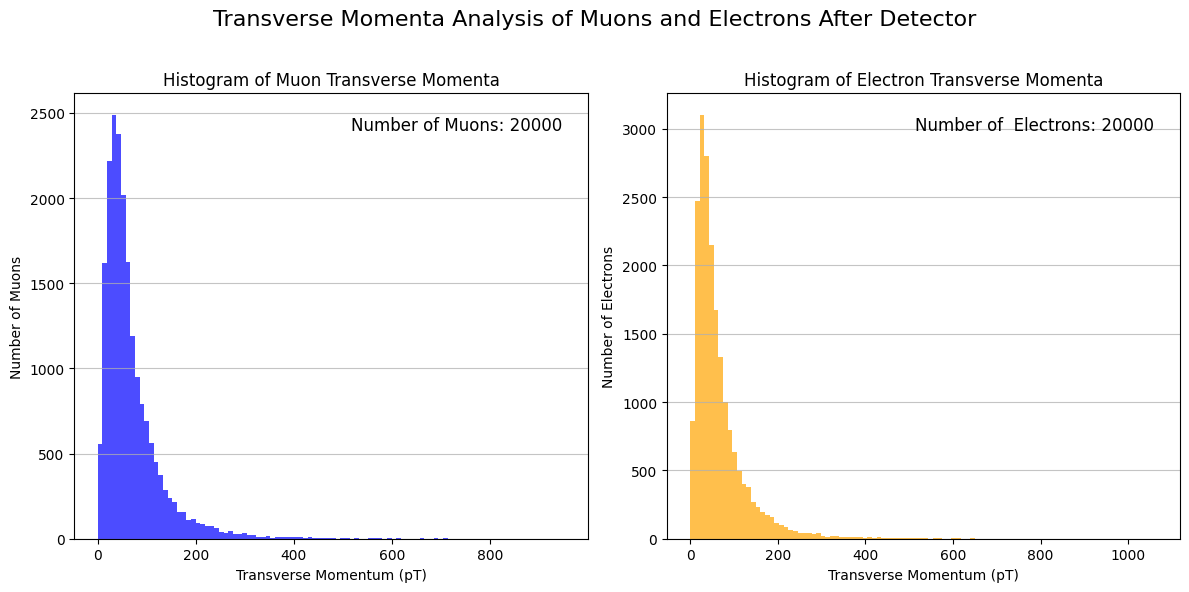

In [54]:

num_muon_events = len(muon_transverse_momenta)
num_electron_events = len(electron_transverse_momenta)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle('Transverse Momenta Analysis of Muons and Electrons After Detector', fontsize=16)

axs[0].hist(muon_transverse_momenta, bins=100, alpha=0.7, color='blue')
axs[0].set_xlabel('Transverse Momentum (pT)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Histogram of Muon Transverse Momenta')
axs[0].grid(axis='y', alpha=0.75)

axs[0].text(0.95, 0.95, f'Number of Muons: {num_muon_events}', 
            ha='right', va='top', fontsize=12, transform=axs[0].transAxes)

axs[1].hist(electron_transverse_momenta, bins=100, alpha=0.7, color='orange')
axs[1].set_xlabel('Transverse Momentum (pT)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Histogram of Electron Transverse Momenta')
axs[1].grid(axis='y', alpha=0.75)

axs[1].text(0.95, 0.95, f'Number of  Electrons: {num_electron_events}', 
            ha='right', va='top', fontsize=12, transform=axs[1].transAxes)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Pseudorapidity 

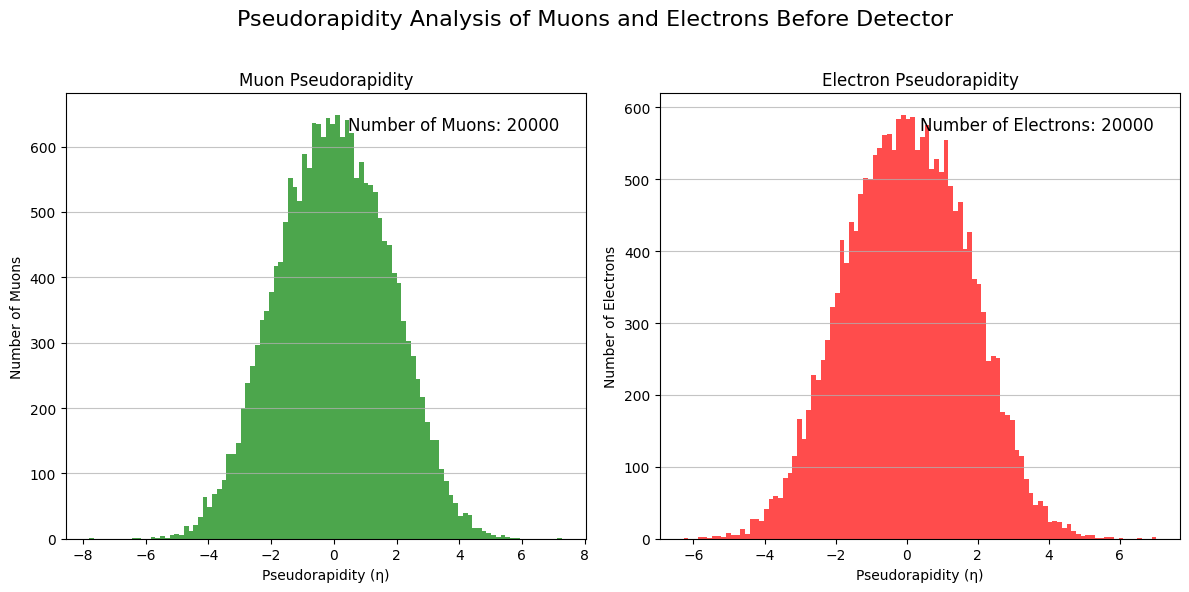

In [85]:
# Create subplots: 1 row, 2 columns (for pseudorapidity histograms)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Overall title
plt.suptitle('Pseudorapidity Analysis of Muons and Electrons Before Detector', fontsize=16)

# --- Muon Pseudorapidity Histogram ---
axs[0].hist(muon_eta, bins=100, alpha=0.7, color='green')
axs[0].set_xlabel('Pseudorapidity (η)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Muon Pseudorapidity')
axs[0].grid(axis='y', alpha=0.75)

# Add text with the number of muons
num_muons = len(muon_eta)
axs[0].text(0.95, 0.95, f'Number of Muons: {num_muons}', 
            ha='right', va='top', fontsize=12, transform=axs[0].transAxes)

# --- Electron Pseudorapidity Histogram ---
axs[1].hist(electron_eta, bins=100, alpha=0.7, color='red')
axs[1].set_xlabel('Pseudorapidity (η)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Electron Pseudorapidity')
axs[1].grid(axis='y', alpha=0.75)

# Add text with the number of electrons
num_electrons = len(electron_eta)
axs[1].text(0.95, 0.95, f'Number of Electrons: {num_electrons}', 
            ha='right', va='top', fontsize=12, transform=axs[1].transAxes)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Phi

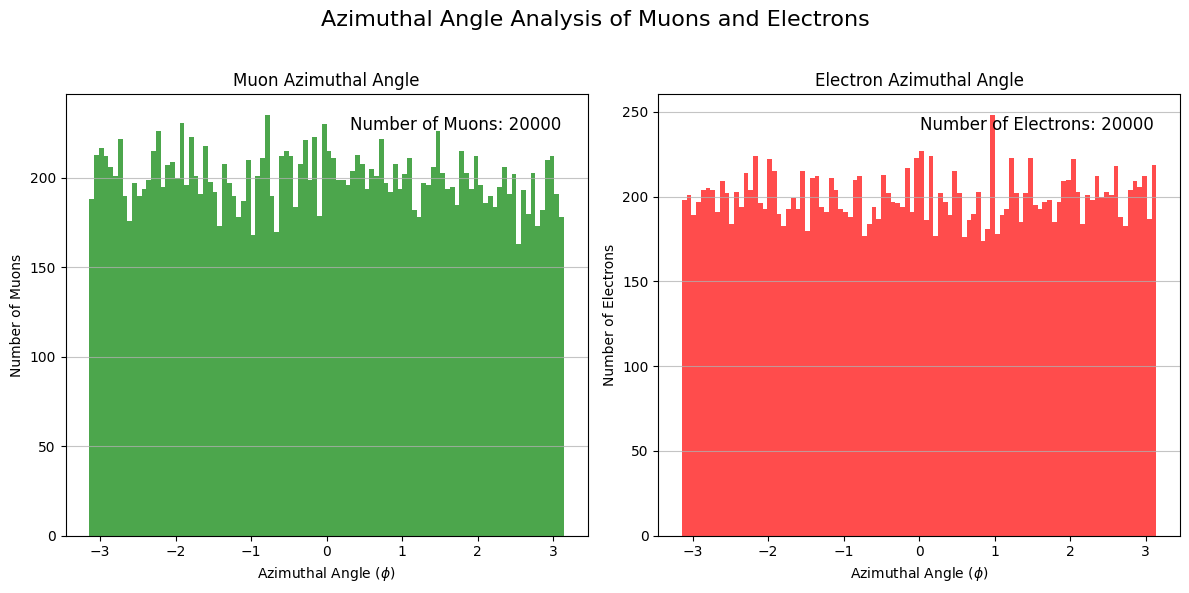

In [76]:
# Create subplots: 1 row, 2 columns (for Azimuthal Angle histograms)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Overall title
plt.suptitle('Azimuthal Angle Analysis of Muons and Electrons Before Detector', fontsize=16)

# --- Muon Azimuthal Angle Histogram ---
axs[0].hist(muon_phi, bins=100, alpha=0.7, color='green')
axs[0].set_xlabel(r'Azimuthal Angle ($\phi$)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Muon Azimuthal Angle')
axs[0].grid(axis='y', alpha=0.75)

# Add text with the number of muons
num_muons = len(muon_phi)
axs[0].text(0.95, 0.95, f'Number of Muons: {num_muons}', 
            ha='right', va='top', fontsize=12, transform=axs[0].transAxes)

# --- Electron Azimuthal Angle Histogram ---
axs[1].hist(electron_phi, bins=100, alpha=0.7, color='red')
axs[1].set_xlabel(r'Azimuthal Angle ($\phi$)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Electron Azimuthal Angle')
axs[1].grid(axis='y', alpha=0.75)

# Add text with the number of electrons
num_electrons = len(electron_phi)
axs[1].text(0.95, 0.95, f'Number of Electrons: {num_electrons}', 
            ha='right', va='top', fontsize=12, transform=axs[1].transAxes)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Polar 

In [82]:
eta_1 = np.array(muon_eta)
muon_theta = 2 * np.arctan(np.exp(-eta_1))

eta_2 = np.array(electron_eta)
electron_theta = 2 * np.arctan(np.exp(-eta_2))


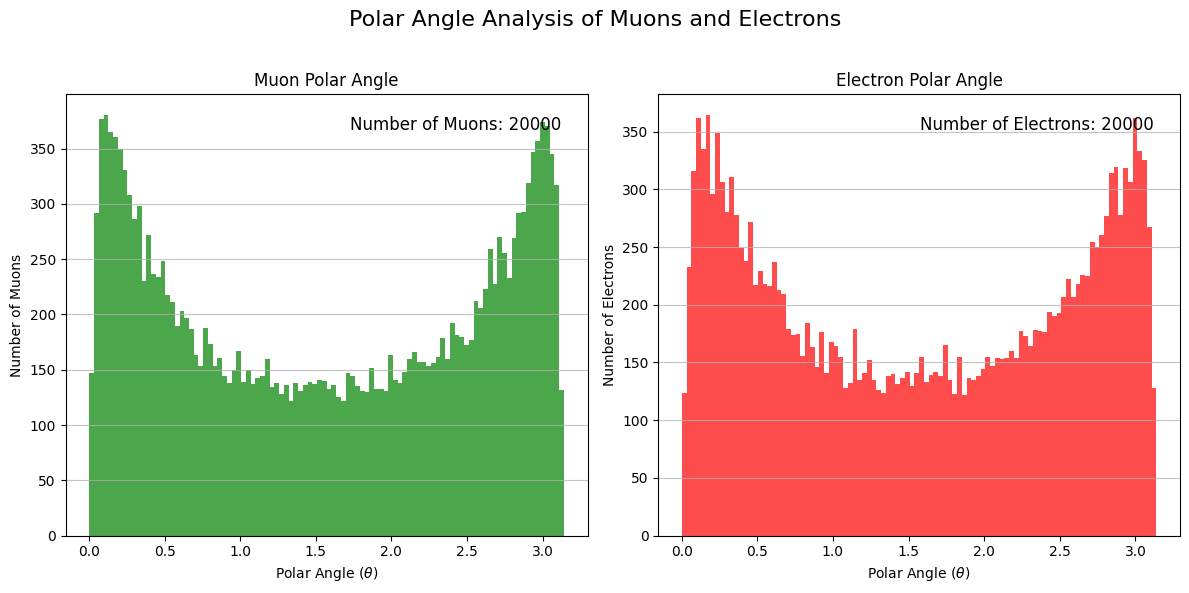

In [84]:
# Create subplots: 1 row, 2 columns (for Polar Angle histograms)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Overall title
plt.suptitle('Polar Angle Analysis of Muons and Electrons Before Detector', fontsize=16)

# --- Muon Polar Angle Histogram ---
axs[0].hist(muon_theta, bins=100, alpha=0.7, color='green')
axs[0].set_xlabel(r'Polar Angle ($\theta$)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Muon Polar Angle')
axs[0].grid(axis='y', alpha=0.75)

# Add text with the number of muons
num_muons = len(muon_theta)
axs[0].text(0.95, 0.95, f'Number of Muons: {num_muons}', 
            ha='right', va='top', fontsize=12, transform=axs[0].transAxes)

# --- Electron Polar Angle Histogram ---
axs[1].hist(electron_theta, bins=100, alpha=0.7, color='red')
axs[1].set_xlabel(r'Polar Angle ($\theta$)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Electron Polar Angle')
axs[1].grid(axis='y', alpha=0.75)

# Add text with the number of electrons
num_electrons = len(electron_theta)
axs[1].text(0.95, 0.95, f'Number of Electrons: {num_electrons}', 
            ha='right', va='top', fontsize=12, transform=axs[1].transAxes)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
